# Milestone 2: Advanced Data Analysis and Feature Engineering 

## 1. Advanced Data Analysis:  


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency


df = pd.read_csv("../data/Milestone1_result_df.csv")
df.head()

,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints,Age
0,1,Divorced,3,Information systems manager,77710.14,High School,30,Retail,Phone,397.0,24,41959.74,0,Not Churned,NaN,211359.05,1.0,0.0,38.0
1,0,Married,1,Charity fundraiser,58209.87,High School,27,SME,Email,665.0,10,8916.67,0,Not Churned,NaN,30624.76,4.0,1.0,25.0
2,0,Single,1,Television production assistant,9794.01,High School,14,Retail,Email,715.0,21,43270.54,0,Not Churned,NaN,111956.61,2.0,6.0,71.0
3,0,Divorced,5,Agricultural engineer,15088.98,High School,23,Corporate,Phone,747.0,17,17887.65,0,Not Churned,NaN,201187.61,1.0,0.0,34.0
4,0,Divorced,2,"Teacher, early years/pre",60726.56,Master's,22,Corporate,Email,549.0,25,32686.84,0,Not Churned,NaN,60391.24,5.0,6.0,33.0


### T-test for continuous variables

In [2]:
# Separate churned and non-churned customers
churned = df[df['Churn Flag'] == 1]
non_churned = df[df['Churn Flag'] == 0]

# T-test for 'Income'
t_stat_income, p_value_income = ttest_ind(churned['Income'], non_churned['Income'], nan_policy='omit')

# T-test for 'Credit Score'
t_stat_credit_score, p_value_credit_score = ttest_ind(churned['Credit Score'], non_churned['Credit Score'], nan_policy='omit')

# Output the results
print(f"T-test for Income: T-statistic = {t_stat_income}, P-value = {p_value_income}")
print(f"T-test for Credit Score: T-statistic = {t_stat_credit_score}, P-value = {p_value_credit_score}")

T-test for Income: T-statistic = 0.7772106607912648, P-value = 0.4370360834014243
T-test for Credit Score: T-statistic = -63.22845914610761, P-value = 0.0


The t-test assesses whether there is a statistically significant difference between the means of two groups. Here's what the results mean:

Income:
 - T-statistic = 0.777 (positive, small magnitude).
 - P-value = 0.437 (greater than the significance level of 0.05).
 - Interpretation: The p-value is above 0.05, so we fail to reject the null hypothesis. There is no statistically significant difference in the mean income between churn and         non-churned customers.
Credit Score:
 - T-statistic = -63.228 (negative, very large magnitude).
 - P-value = 0.0 (much less than 0.05).
 - Interpretation: The p-value is essentially 0, so we reject the null hypothesis. There is a statistically significant difference in the mean credit score between churned and non-churned customers. The negative t-statistic suggests that the mean credit score of churned customers is lower than that of non-churned customers.

### Chi-Square Test for categorical variables


In [3]:
# Chi-Square Test for 'Gender'
gender_churn_table = pd.crosstab(df['Gender'], df['Churn Flag'])
chi2_stat_gender, p_val_gender, dof_gender, expected_gender = chi2_contingency(gender_churn_table)

# Chi-Square Test for 'Marital Status'
marital_status_churn_table = pd.crosstab(df['Marital Status'], df['Churn Flag'])
chi2_stat_marital, p_val_marital, dof_marital, expected_marital = chi2_contingency(marital_status_churn_table)

# Output the results
print(f"Chi-Square Test for Gender: Chi2-statistic = {chi2_stat_gender}, P-value = {p_val_gender}")
print(f"Chi-Square Test for Marital Status: Chi2-statistic = {chi2_stat_marital}, P-value = {p_val_marital}")

Chi-Square Test for Gender: Chi2-statistic = 0.18182591513351626, P-value = 0.6698087511158981
Chi-Square Test for Marital Status: Chi2-statistic = 5.093006063548695, P-value = 0.07835519308518409


### Create a Correlation Matrix

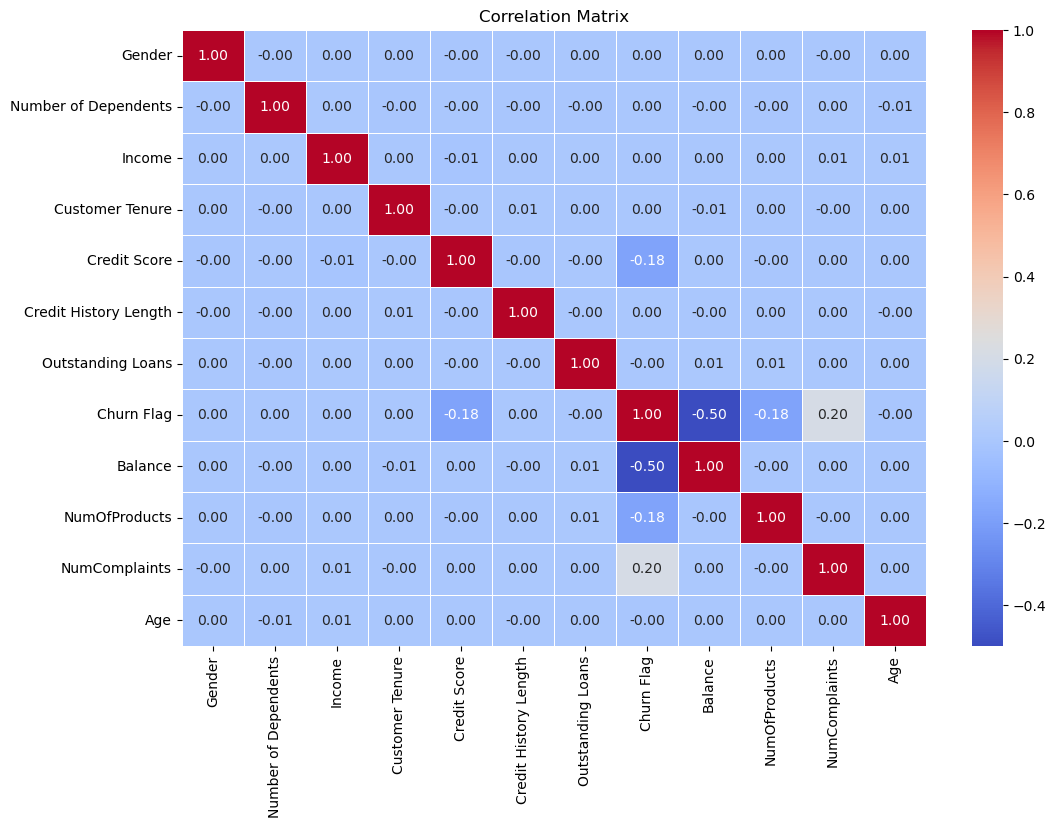

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Selecting only numerical columns for correlation
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Recursive Feature Elimination (RFE)

In [5]:
# Drop non-numeric columns and irrelevant columns like CustomerId, First Name, etc.
X = df.drop(columns=['Churn Flag', 'Churn Reason', 'Churn Date'])

# Select only numeric columns
X = X.select_dtypes(include=[np.number])

# Define the target variable
y = df['Churn Flag']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the logistic regression model and specify the number of features to select
from sklearn.feature_selection import RFE
rfe = RFE(estimator=model, n_features_to_select=10)  # You can adjust this number as needed

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features: ", selected_features)


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Features:  Index(['Gender', 'Number of Dependents', 'Customer Tenure', 'Credit Score',
       'Credit History Length', 'Outstanding Loans', 'Balance',
       'NumOfProducts', 'NumComplaints', 'Age'],
      dtype='object')


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Prepare the Data (Using Selected Features)

In [6]:
# Create a new dataset with only the selected features
X_selected = X[selected_features]

# Split the data again into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Train the Logistic Regression Model

In [7]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model using the selected features
model.fit(X_train_selected, y_train)


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Evaluate the Model

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display classification report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9628588723625043
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     20301
           1       0.89      0.79      0.84      2827

    accuracy                           0.96     23128
   macro avg       0.93      0.89      0.91     23128
weighted avg       0.96      0.96      0.96     23128

Confusion Matrix:
 [[20028   273]
 [  586  2241]]


### Visualize the Results

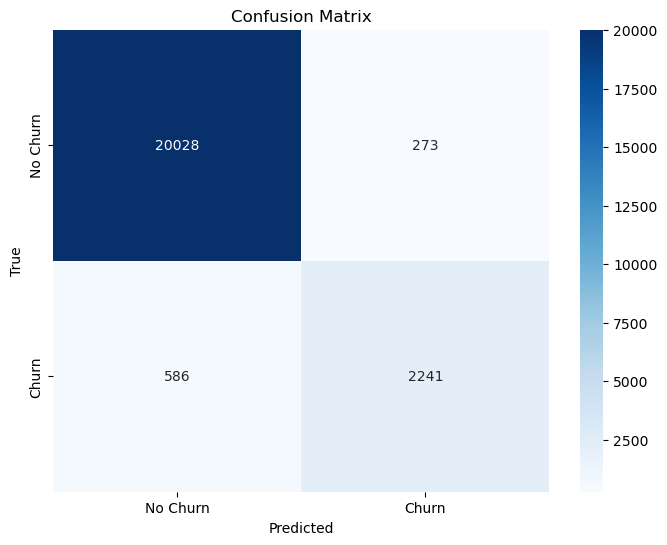

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20301
           1       0.89      0.79      0.84      2827

    accuracy                           0.96     23128
   macro avg       0.93      0.89      0.91     23128
weighted avg       0.96      0.96      0.96     23128

Accuracy: 0.96
Precision: 0.89
Recall: 0.79
F1 Score: 0.84


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming we have already made predictions
# y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Also print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: you can also calculate and print accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


## Feature Engineering:  

In [10]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Drop non-predictive or identifier columns
df_fe = df

# Step 2: Convert date columns to datetime
df_fe['Churn Date'] = pd.to_datetime(df_fe['Churn Date'], errors='coerce')

# Step 3: Create new features
df_fe['Days Since Churn'] = (pd.Timestamp.now() - df_fe['Churn Date']).dt.days.fillna(-1)


# Step 5: Encode categorical variables
categorical_cols = [
    'Gender', 'Marital Status', 'Occupation', 'Education Level', 
    'Customer Segment', 'Preferred Communication Channel', 'Churn Reason'
]
for col in categorical_cols:
    df_fe[col] = LabelEncoder().fit_transform(df_fe[col])

# Step 6: Create ratio-based features
df_fe['Debt-to-Income Ratio'] = df_fe['Outstanding Loans'] / (df_fe['Income'] + 1)
df_fe['Products per Tenure'] = df_fe['NumOfProducts'] / (df_fe['Customer Tenure'] + 1)
df_fe['Complaints per Product'] = df_fe['NumComplaints'] / (df_fe['NumOfProducts'] + 1)

# Step 7: Drop raw date columns (if not needed anymore)
df_fe.drop(columns=['Churn Date'], inplace=True)

# Step 8: Save the engineered dataset
df_fe.to_csv('../data/Milestone2_result_df.csv',index=False)